In [1]:
import matplotlib.pyplot as plt
import numpy as np

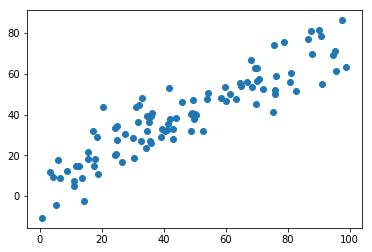

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100, size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size=100)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

### demean

In [3]:
def demean(X):
    """样本均值归0"""
    return X - np.mean(X, axis=0)

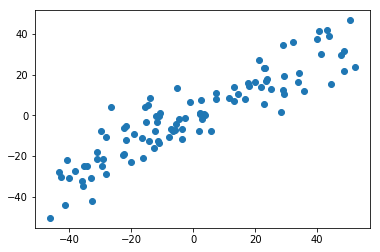

In [4]:
X_demean = demean(X)

plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.show()

In [5]:
print(np.mean(X_demean, axis=0))

[2.23820962e-14 1.03028697e-14]


## 梯度上升法

In [6]:
# 目标函数
def f(w, X):
    return np.sum((X.dot(w))**2) / len(X)

# 数学知识求梯度
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

# 梯度定义求梯度
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

In [7]:
# 求w方向的单位向量
def direction(w):
    return w / np.linalg.norm(w)

# 梯度上升法
def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    cur_iter = 0
    w = direction(initial_w)
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)
        if (abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        cur_iter += 1
    
    return w

In [8]:
# 初始w不能为0
initial_w = np.random.random(X.shape[1])
initial_w = direction(initial_w)

eta = 0.001

In [9]:
# 不能使用standardScale对数据进行标准化

In [10]:
w = gradient_ascent(df_debug, X_demean, initial_w, eta)
w

array([0.79823424, 0.60234715])

In [11]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)
w

array([0.79823424, 0.60234715])

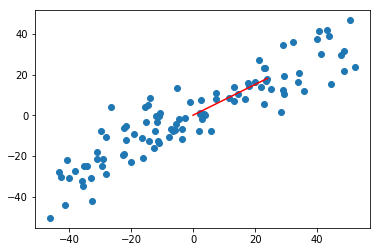

In [12]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot([0, w[0] * 30], [0, w[1] * 30], color='r')
plt.show()

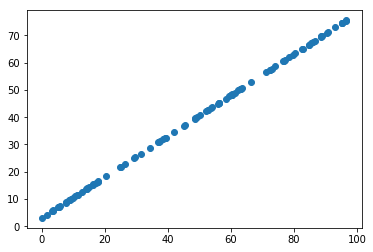

In [13]:
X2 = np.empty((100, 2))
X2[:, 0] = np.random.uniform(0., 100, size=100)
X2[:, 1] = 0.75 * X2[:, 0] + 3. 
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

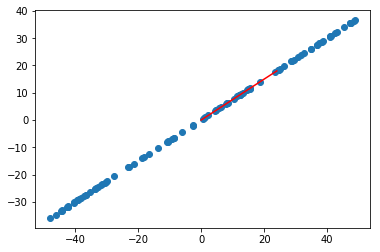

In [14]:
X2_demean = demean(X2)
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)
plt.scatter(X2_demean[:, 0], X2_demean[:, 1])
plt.plot([0, w2[0] * 30], [0, w2[1] * 30], color='r')
plt.show()

## 获取前n个主成分

In [15]:
def demean(X):
    """样本均值归0"""
    return X - np.mean(X, axis=0)

# 目标函数
def f(w, X):
    return np.sum((X.dot(w))**2) / len(X)

# 求梯度
def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

# 求w方向的单位向量
def direction(w):
    return w / np.linalg.norm(w)

# 求数据的第一主成分
def first_component(X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    cur_iter = 0
    w = direction(initial_w)
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)
        if (abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        cur_iter += 1
    
    return w

# 求数据的前n个主成分
def first_n_component(n, X, eta=0.01, n_iters=1e4, epsilon=1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        
        # 数据减去在当前第一主成分上的分量，得到新的数据
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
        
    return res

In [18]:
first_n_component(2, X_demean)

[array([0.79823366, 0.60234793]), array([-0.6023426 ,  0.79823768])]

In [19]:
res = first_n_component(2, X)
res[0].dot(res[1])

6.31203887263565e-06

In [27]:
from playML.PCA import PCA

pca = PCA(n_components=2)
pca.fit(X)

array([[ 0.79823373,  0.60234783],
       [-0.60234269,  0.79823761]])

In [28]:
pca

PCA(n__components = 2

In [33]:
from playML.PCA import PCA

pca = PCA(n_components=1)
pca.fit(X)

array([[0.79823366, 0.60234793]])

In [30]:
X_reduction = pca.transform(X)
X_reduction.shape

(100, 1)

In [31]:
X_restore = pca.inverse_transform(X_reduction)
X_restore.shape

(100, 2)

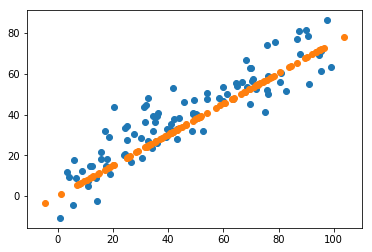

In [32]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X_restore[:, 0], X_restore[:, 1])
plt.show()

## scikit-learn 中的PCA

In [39]:
from sklearn.decomposition import PCA

pca_ = PCA(n_components=1)
pca_.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [35]:
X_reduction = pca.transform(X)
X_reduction.shape

(100, 1)

In [36]:
X_restore = pca.inverse_transform(X_reduction)
X_restore.shape

(100, 2)

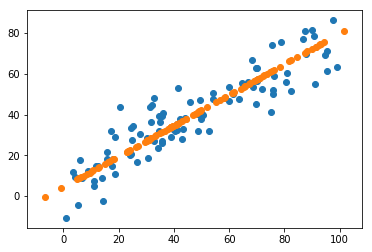

In [37]:
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X_restore[:, 0], X_restore[:, 1])
plt.show()

In [40]:
pca_.components_

array([[0.7982338 , 0.60234773]])

# PCA在手写字母识别上的应用

In [41]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [43]:
X_train.shape

(1347, 64)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [46]:
knn_clf.score(X_test, y_test)

0.9866666666666667

## 1、采用PCA降维

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [48]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [50]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)


Wall time: 11.8 ms


In [51]:
knn_clf.score(X_test_reduction, y_test)

0.6066666666666667

### 利用pca.explained_variance_ratio_查看数据集各主成分的解释方差的比例

In [52]:
pca.explained_variance_ratio_

array([0.14566817, 0.13735469])

### 由此确定最佳的k维主成分

In [53]:
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
pca.explained_variance_ratio_

array([1.45668166e-01, 1.37354688e-01, 1.17777287e-01, 8.49968861e-02,
       5.86018996e-02, 5.11542945e-02, 4.26605279e-02, 3.60119663e-02,
       3.41105814e-02, 3.05407804e-02, 2.42337671e-02, 2.28700570e-02,
       1.80304649e-02, 1.79346003e-02, 1.45798298e-02, 1.42044841e-02,
       1.29961033e-02, 1.26617002e-02, 1.01728635e-02, 9.09314698e-03,
       8.85220461e-03, 7.73828332e-03, 7.60516219e-03, 7.11864860e-03,
       6.85977267e-03, 5.76411920e-03, 5.71688020e-03, 5.08255707e-03,
       4.89020776e-03, 4.34888085e-03, 3.72917505e-03, 3.57755036e-03,
       3.26989470e-03, 3.14917937e-03, 3.09269839e-03, 2.87619649e-03,
       2.50362666e-03, 2.25417403e-03, 2.20030857e-03, 1.98028746e-03,
       1.88195578e-03, 1.52769283e-03, 1.42823692e-03, 1.38003340e-03,
       1.17572392e-03, 1.07377463e-03, 9.55152460e-04, 9.00017642e-04,
       5.79162563e-04, 3.82793717e-04, 2.38328586e-04, 8.40132221e-05,
       5.60545588e-05, 5.48538930e-05, 1.08077650e-05, 4.01354717e-06,
      

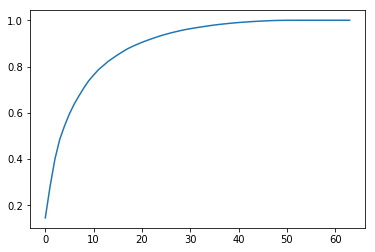

In [54]:
plt.plot([i for i in range(X_train.shape[1])],
         [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])
plt.show()

### 传入0-1之间的参数，确定需要百分比的方差

In [55]:
pca = PCA(0.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [56]:
pca.n_components_

28

In [58]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [59]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

Wall time: 23 ms


In [60]:
knn_clf.score(X_test_reduction, y_test)

0.98

极大了减少了运算的时间，但模型的准确度只下降0.01